<a href="https://colab.research.google.com/github/androidghbm/helloworld/blob/main/PyTorchMultiClassMultiFeatureClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor([[ -8.5714,   8.6663,   9.8848,  -6.6618,  -5.2504],
        [ -5.6494,  -8.0774,   8.9235,   3.7762,   6.2347],
        [  4.0851,  -6.3081,  -9.8725,   3.9239,  -2.5361],
        [ -5.0133,   9.8293,   3.6459,   2.8291,  -8.0245],
        [ -6.6459,   0.2966, -12.2366,   7.6601,  -8.1519]]) tensor([2, 1, 7, 0, 8])


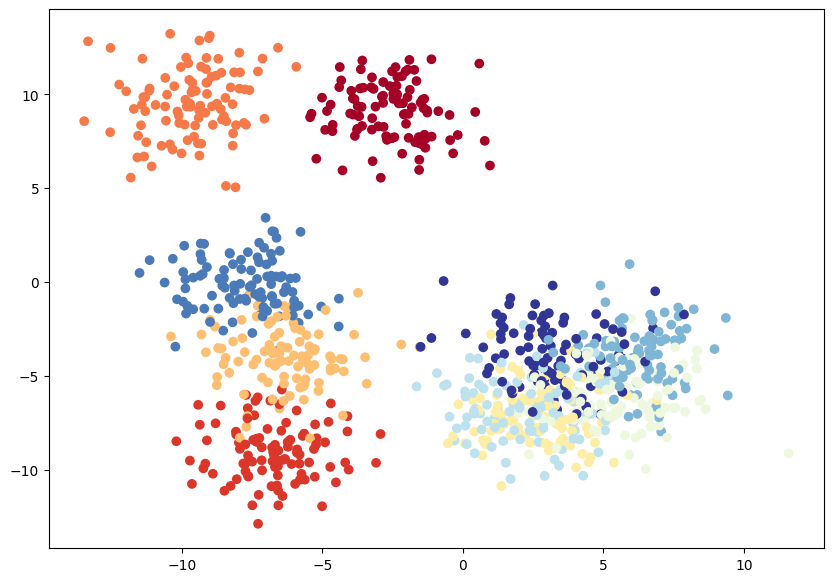

In [1]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 10
NUM_FEATURES = 5
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [2]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=80):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=5, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [4]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [5]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.0550, -0.9601, -0.7282, -1.1035, -0.2876,  0.7870, -0.1984, -1.1474,
         -1.0536,  0.1867],
        [-1.4287, -0.5005, -0.1541,  0.8605,  1.0608, -1.5221,  1.3747, -0.7675,
         -0.2632,  1.2972],
        [ 0.3339, -1.0808, -0.6525, -0.9782,  0.4134,  1.0434, -0.2702, -0.9438,
         -0.5299,  0.3664],
        [-1.1140,  2.7042,  1.3293,  2.3187, -1.1808, -0.9685, -0.7033,  1.5492,
          1.6549, -1.2267],
        [ 0.2259, -1.1046, -0.9956, -0.8717,  0.6875,  0.9079,  0.6314, -1.5141,
         -0.3352,  0.1458]], device='cuda:0', grad_fn=<SliceBackward0>)

In [6]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[ 0.0550, -0.9601, -0.7282, -1.1035, -0.2876,  0.7870, -0.1984, -1.1474,
         -1.0536,  0.1867],
        [-1.4287, -0.5005, -0.1541,  0.8605,  1.0608, -1.5221,  1.3747, -0.7675,
         -0.2632,  1.2972],
        [ 0.3339, -1.0808, -0.6525, -0.9782,  0.4134,  1.0434, -0.2702, -0.9438,
         -0.5299,  0.3664],
        [-1.1140,  2.7042,  1.3293,  2.3187, -1.1808, -0.9685, -0.7033,  1.5492,
          1.6549, -1.2267],
        [ 0.2259, -1.1046, -0.9956, -0.8717,  0.6875,  0.9079,  0.6314, -1.5141,
         -0.3352,  0.1458]], device='cuda:0', grad_fn=<SliceBackward0>)

In [7]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([10]), 10)

In [8]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.2610, -1.1878, -0.7841, -0.9660, -0.1639,  0.4807,  0.0764, -1.2544,
         -1.3478,  0.4845],
        [ 0.5939, -1.0019, -0.6368, -1.1108,  0.3704,  1.3512, -0.5063, -0.8654,
         -0.3565,  0.1809],
        [-0.9981, -1.0379, -0.5241,  0.1930,  1.3630, -1.0747,  1.4794, -1.2691,
         -0.4113,  1.4161],
        [ 0.0779, -0.1846, -0.5480, -0.3180,  0.0840,  0.7039,  0.2654, -0.9098,
          0.1259, -0.4034],
        [ 0.3991,  0.5918, -0.0815, -0.3558, -0.6938,  0.9455, -0.7384, -0.2378,
          0.4724, -0.9237]], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([[0.1010, 0.0400, 0.0599, 0.0499, 0.1113, 0.2121, 0.1415, 0.0374, 0.0341,
         0.2129],
        [0.1607, 0.0326, 0.0469, 0.0292, 0.1285, 0.3427, 0.0535, 0.0374, 0.0621,
         0.1063],
        [0.0227, 0.0218, 0.0365, 0.0747, 0.2407, 0.0210, 0.2705, 0.0173, 0.0408,
         0.2539],
        [0.1099, 0.0845, 0.0588, 0.0740, 0.1106, 0.2055, 0.1326, 0.0409, 0.1153,
         0.0679],
        [0.1324

In [9]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [10]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1010, 0.0400, 0.0599, 0.0499, 0.1113, 0.2121, 0.1415, 0.0374, 0.0341,
        0.2129], device='cuda:0', grad_fn=<SelectBackward0>)
tensor(9, device='cuda:0')


In [11]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc


In [12]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.44460, Acc: 10.88% | Test Loss: 1.90310, Test Acc: 10.00%
Epoch: 10 | Loss: 0.70939, Acc: 86.62% | Test Loss: 0.61149, Test Acc: 89.50%
Epoch: 20 | Loss: 0.34064, Acc: 90.62% | Test Loss: 0.30162, Test Acc: 91.00%
Epoch: 30 | Loss: 0.24172, Acc: 91.00% | Test Loss: 0.21594, Test Acc: 91.00%
Epoch: 40 | Loss: 0.20353, Acc: 91.88% | Test Loss: 0.18099, Test Acc: 91.00%
Epoch: 50 | Loss: 0.18348, Acc: 92.25% | Test Loss: 0.16239, Test Acc: 91.50%
Epoch: 60 | Loss: 0.17105, Acc: 92.75% | Test Loss: 0.15094, Test Acc: 92.00%
Epoch: 70 | Loss: 0.16249, Acc: 93.12% | Test Loss: 0.14322, Test Acc: 92.50%
Epoch: 80 | Loss: 0.15617, Acc: 93.12% | Test Loss: 0.13767, Test Acc: 92.50%
Epoch: 90 | Loss: 0.15124, Acc: 93.25% | Test Loss: 0.13346, Test Acc: 92.50%


In [13]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  6.2801,   0.0849,  13.9386,   7.5591,  -9.8564,  -3.5185, -13.8788,
         -15.8420,  -4.2980,   2.8663],
        [  2.3877, -11.1266,  -4.1377,  -2.5265,   2.7585,  10.7334,  -5.1233,
           6.3513,  -3.3700,   9.0544],
        [-12.4022,  12.8339,   1.3470,  10.4275,   6.3011,  -5.4483,   5.9157,
         -10.3657,  -6.1138,  -5.2302],
        [ -7.6030,  -1.2203,  -4.9788,   3.3358,   8.7636,   1.2516,   3.8946,
           3.5411,  -2.5136,  -0.5709],
        [  2.4090,  -4.1982,  -1.1139,   0.9170,  -1.3729,   0.7991,  -0.2545,
           2.4509,   5.3686,  -1.9484],
        [ -0.9573,  -9.6226,  -9.2436,  -5.3399,   6.5270,   7.3435,   2.2512,
          12.9209,   0.9058,   3.9550],
        [  3.3845,  -1.5254,  -1.7890,  -1.0325,  -3.5040,  -1.5399,   2.7912,
           3.2365,   9.2491,  -5.2472],
        [ -0.2408,  -7.5596,  -0.8797,   2.4266,   3.2064,   7.4983,  -5.6912,
           0.7551,  -5.3219,   7.1395],
        [  6.3893,  -3.1053,  -1.2988,  -2.8708,

In [14]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([2, 5, 1, 4, 8, 7, 8, 5, 8, 0], device='cuda:0')
Labels: tensor([2, 5, 1, 4, 8, 7, 8, 9, 8, 0], device='cuda:0')
Test accuracy: 93.0%


In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10201x2 and 5x8)

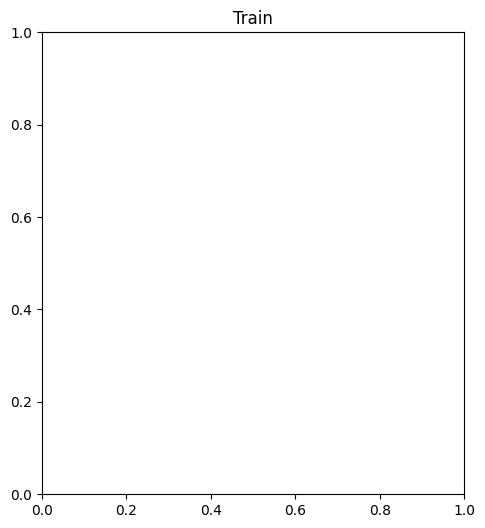

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)